In [174]:
! pip install bs4

In [175]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup


In [176]:
URL='https://www.goodreads.com/list/show/1381.Best_Series'

In [177]:
page=requests.get(URL)
page

<Response [200]>

In [178]:
page.status_code

200

In [179]:
htmlcode=page.text

In [180]:
soup=BeautifulSoup(htmlcode)

In [182]:
print(soup.prettify())

<!DOCTYPE html>
<html class="desktop withSiteHeaderTopFullImage">
 <head>
  <title>
   Best Series (3030 books)
  </title>
  <meta content="3,033 books based on 10480 votes: Harry Potter and the Sorcerer's Stone by J.K. Rowling, The Lightning Thief by Rick Riordan, The Hunger Games by Suzanne..." name="description"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://www.goodreads.com/list/show/1381.Best_Series" rel="canonical"/>
  <script type="text/javascript">
   var ue_t0=window.ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   var ue_mid = "A1PQBFHBHS6YH1";
    var ue_sn = "www.goodreads.com";
    var ue_furl = "fls-na.amazon.com";
    var ue_sid = "697-4345319-6413553";
    var ue_id = "659QTH45V173FT9CX3F9";

    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}functio

#### URL=`https://www.goodreads.com/list/show/1381.Best_Series`

#### title - > span itemprop = `name` 
#### author - > span itemprop = `author`
#### rating - > span class = `minirating`
#### score - > a href = `#`
#### votes - > span class = `smallText uitext`
                


In [183]:
title=soup.find('span',attrs={'itemprop':'name'})
title.text

"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"

In [184]:
author=soup.find('span',attrs={'itemprop':'author'})
author.text

'\n\nJ.K. Rowling\n\n'

In [185]:
rating=soup.find('span',attrs={'class':'minirating'})
rating.text

' 4.47 avg rating — 9,100,670 ratings'

In [186]:
score=soup.find('a',attrs={'href':'#'})
score.text

'score: 343,625'

In [187]:
votes=soup.find('span',attrs={'class':'smallText uitext'})
votes.text

'\nscore: 343,625,\n              and\n3,467 people voted\n              \u2003\n              \n            '

#### All URL's

#### https://www.goodreads.com/list/show/1381.Best_Series?page=2
#### https://www.goodreads.com/list/show/1381.Best_Series?page=3
#### https://www.goodreads.com/list/show/1381.Best_Series?page=4
#### https://www.goodreads.com/list/show/1381.Best_Series?page=5
#### https://www.goodreads.com/list/show/1381.Best_Series?page=6

In [14]:
# Code



'''
URL='https://www.goodreads.com/list/show/1381.Best_Series?page=6'
'''
for i in range(1,7):
    print('https://www.goodreads.com/list/show/1381.Best_Series?page={}'.format(i))

https://www.goodreads.com/list/show/1381.Best_Series?page=1
https://www.goodreads.com/list/show/1381.Best_Series?page=2
https://www.goodreads.com/list/show/1381.Best_Series?page=3
https://www.goodreads.com/list/show/1381.Best_Series?page=4
https://www.goodreads.com/list/show/1381.Best_Series?page=5
https://www.goodreads.com/list/show/1381.Best_Series?page=6


#### URL = `https://www.goodreads.com/list/show/1381.Best_Series`

#### title - > span itemprop = `name` 
#### author - > span itemprop = `author`
#### rating - > span class = `minirating`
#### score - > a href=`#`
#### votes - > span class = `smallText uitext`

### Web Scrapping

In [188]:
title=[]
author=[]
rating=[]
score=[]
votes=[]

for i in range(1,6):
    URL='https://www.goodreads.com/list/show/1381.Best_Series?page={}'.format(i)
    
    page=requests.get(URL)
    htmlcode=page.text
    soup=BeautifulSoup(htmlcode)
    
    for x in soup.find_all('td',attrs={'width':'100%'}):
        
        Title=x.find('span',attrs={'itemprop':'name'})
        if Title is None:
            title.append(np.NaN)
        else:
            title.append(Title.text)
            
        Author=x.find('span',attrs={'itemprop':'author'})
        if Author is None:
            author.append(np.NaN)
        else:
            author.append(Author.text)
            
        Rating=x.find('span',attrs={'class':'minirating'})
        if Rating is None:
            rating.append(np.NaN)
        else:
            rating.append(Rating.text)   
            
        Score=x.find('a',attrs={'href':'#'})
        if Score is None:
            score.append(np.NaN)
        else:
            score.append(Score.text)
            
        Votes=x.find('span',attrs={'class':'smallText uitext'})
        if Votes is None:
            votes.append(np.NaN)
        else:
            votes.append(Votes.text)
            

In [189]:
print(len(title))
print(len(author))
print(len(rating))
print(len(score))
print(len(votes))

500
500
500
500
500


#### Create a DataFrame and save it in csv file

In [290]:
df = pd.DataFrame({'Title' :title,'Author':author,'Rating' : rating,'Score':score,'Votes':votes})

In [291]:
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Sorcerer's Stone (Harry P...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,100,670 ratings","score: 343,625","\nscore: 343,625,\n and\n3,467 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.29 avg rating — 2,633,971 ratings","score: 149,848","\nscore: 149,848,\n and\n1,537 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.32 avg rating — 7,812,649 ratings","score: 142,841","\nscore: 142,841,\n and\n1,462 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,892,338 ratings","score: 140,819","\nscore: 140,819,\n and\n1,442 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.16 avg rating — 3,643,042 ratings","score: 134,735","\nscore: 134,735,\n and\n1,388 pe..."


In [292]:
import os
os.getcwd()

'C:\\Users\\bbhav\\Downloads'

In [293]:
df.to_csv(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.csv", index = False)

In [294]:
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Sorcerer's Stone (Harry P...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,100,670 ratings","score: 343,625","\nscore: 343,625,\n and\n3,467 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.29 avg rating — 2,633,971 ratings","score: 149,848","\nscore: 149,848,\n and\n1,537 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.32 avg rating — 7,812,649 ratings","score: 142,841","\nscore: 142,841,\n and\n1,462 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,892,338 ratings","score: 140,819","\nscore: 140,819,\n and\n1,442 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.16 avg rating — 3,643,042 ratings","score: 134,735","\nscore: 134,735,\n and\n1,388 pe..."


In [295]:
df.to_excel(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.xlsx")

# Extracting the Details using Regex

In [296]:
import numpy as np
import pandas as pd

import re
import warnings
warnings.filterwarnings('ignore')

In [297]:
df = pd.read_csv(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.csv")
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Sorcerer's Stone (Harry P...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,100,670 ratings","score: 343,625","\nscore: 343,625,\n and\n3,467 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.29 avg rating — 2,633,971 ratings","score: 149,848","\nscore: 149,848,\n and\n1,537 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.32 avg rating — 7,812,649 ratings","score: 142,841","\nscore: 142,841,\n and\n1,462 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,892,338 ratings","score: 140,819","\nscore: 140,819,\n and\n1,442 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.16 avg rating — 3,643,042 ratings","score: 134,735","\nscore: 134,735,\n and\n1,388 pe..."


### Cleaning Author col

In [198]:
Author

<span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<div class="authorName__container">
<a class="authorName" href="https://www.goodreads.com/author/show/146374.Joseph_Delaney" itemprop="url"><span itemprop="name">Joseph Delaney</span></a>
</div>
</span>

In [69]:
# regex=r'\>[A-Za-z]+\s[A-Za-z]+'

In [298]:
df['Author']=df['Author'].str.replace('\n','').replace('\(Goodreads Author\)','',regex=True)

In [299]:
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,"4.47 avg rating — 9,100,670 ratings","score: 343,625","\nscore: 343,625,\n and\n3,467 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"4.29 avg rating — 2,633,971 ratings","score: 149,848","\nscore: 149,848,\n and\n1,537 pe..."
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.32 avg rating — 7,812,649 ratings","score: 142,841","\nscore: 142,841,\n and\n1,462 pe..."
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"4.08 avg rating — 1,892,338 ratings","score: 140,819","\nscore: 140,819,\n and\n1,442 pe..."
4,"Divergent (Divergent, #1)",Veronica Roth,"4.16 avg rating — 3,643,042 ratings","score: 134,735","\nscore: 134,735,\n and\n1,388 pe..."


### Splitting Rating col

In [300]:
df[['Ratings','Reviews']]=df['Rating'].str.split('—',expand=True)

In [301]:
df.head()

,Title,Author,Rating,Score,Votes,Ratings,Reviews
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,"4.47 avg rating — 9,100,670 ratings","score: 343,625","\nscore: 343,625,\n and\n3,467 pe...",4.47 avg rating,"9,100,670 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"4.29 avg rating — 2,633,971 ratings","score: 149,848","\nscore: 149,848,\n and\n1,537 pe...",4.29 avg rating,"2,633,971 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.32 avg rating — 7,812,649 ratings","score: 142,841","\nscore: 142,841,\n and\n1,462 pe...",4.32 avg rating,"7,812,649 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"4.08 avg rating — 1,892,338 ratings","score: 140,819","\nscore: 140,819,\n and\n1,442 pe...",4.08 avg rating,"1,892,338 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,"4.16 avg rating — 3,643,042 ratings","score: 134,735","\nscore: 134,735,\n and\n1,388 pe...",4.16 avg rating,"3,643,042 ratings"


In [302]:
# Dropping Rating col

df.drop('Rating',axis=1,inplace=True)

In [303]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,"score: 343,625","\nscore: 343,625,\n and\n3,467 pe...",4.47 avg rating,"9,100,670 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"score: 149,848","\nscore: 149,848,\n and\n1,537 pe...",4.29 avg rating,"2,633,971 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"score: 142,841","\nscore: 142,841,\n and\n1,462 pe...",4.32 avg rating,"7,812,649 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"score: 140,819","\nscore: 140,819,\n and\n1,442 pe...",4.08 avg rating,"1,892,338 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,"score: 134,735","\nscore: 134,735,\n and\n1,388 pe...",4.16 avg rating,"3,643,042 ratings"


### Cleaning Score col

In [304]:
df['Score']=df['Score'].str.replace('score: ','')

In [305]:
df.Score=df.Score.apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

In [306]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,"\nscore: 343,625,\n and\n3,467 pe...",4.47 avg rating,"9,100,670 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,"\nscore: 149,848,\n and\n1,537 pe...",4.29 avg rating,"2,633,971 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,"\nscore: 142,841,\n and\n1,462 pe...",4.32 avg rating,"7,812,649 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,"\nscore: 140,819,\n and\n1,442 pe...",4.08 avg rating,"1,892,338 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,134735,"\nscore: 134,735,\n and\n1,388 pe...",4.16 avg rating,"3,643,042 ratings"


### Cleaning Votes col

In [307]:
regex=r'(.*)\s?people'

df['Votes']=df['Votes'].apply(lambda x:re.findall(regex,x))

In [308]:
df.Votes=df.Votes.apply(lambda x:''.join(x))

In [309]:
df.Votes=df.Votes.apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

In [310]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47 avg rating,"9,100,670 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29 avg rating,"2,633,971 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32 avg rating,"7,812,649 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08 avg rating,"1,892,338 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16 avg rating,"3,643,042 ratings"


### Cleaning Ratings col

In [311]:
df['Ratings']=df['Ratings'].str.replace('avg rating','').replace('really liked it','',regex=True)

In [312]:
df['Ratings']=df['Ratings'].apply(lambda x: float(x))

In [313]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,"9,100,670 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,"2,633,971 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,"7,812,649 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,"1,892,338 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,"3,643,042 ratings"


### Cleaning Reviews col

In [314]:
df['Reviews']=df['Reviews'].str.replace('ratings','')

In [315]:
df['Reviews']=df['Reviews'].apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

In [316]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042


### Creating Overview col

In [317]:
df['Overview']=df['Ratings'].apply(lambda x: 'Excellent' if x>=4.5 else('Good' if x>=4 else('Average' if x>=3 else x)))

In [318]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670,Good
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971,Good
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649,Good
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338,Good
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042,Good


### Creating Hashtag col

In [220]:
Title

<span aria-level="4" itemprop="name" role="heading">Revenge of the Witch (The Last Apprentice / Wardstone Chronicles, #1)</span>

In [319]:
df['Hashtag']='#1'

In [320]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670,Good,#1
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971,Good,#1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649,Good,#1
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338,Good,#1
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042,Good,#1


In [321]:
df['Hashtag'][90:91]='#0'

In [322]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670,Good,#1
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971,Good,#1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649,Good,#1
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338,Good,#1
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042,Good,#1


In [228]:
df.Hashtag.value_counts()

#1    499
#0      1
Name: Hashtag, dtype: int64

In [323]:
df['Hashtag'][467:468]='#2'

In [324]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670,Good,#1
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971,Good,#1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649,Good,#1
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338,Good,#1
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042,Good,#1


In [593]:
##regex=r'\W\d'
##df['Hashtag']=df['Title'].apply(lambda x:re.findall(regex,x))

In [100]:
##df.head()

In [231]:
df.Hashtag.value_counts()

#1    498
#0      1
#2      1
Name: Hashtag, dtype: int64

### Creating Denotes col

In [325]:
df['Denotes']=df['Hashtag'].apply(lambda x: 'First Book' if x=='#1' else('Prequel' if x=='#0' else('Prequel of the next Book' if x=='#2' else x)))

In [326]:
df.Denotes=df.Denotes.apply(lambda x:''.join(x))

In [327]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book


In [328]:
df.Hashtag=df.Hashtag.apply(lambda x:''.join(x))

In [329]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book


### Creating Series col

In [330]:
regex=r'\((.*)?,'

df['Series']=df['Title'].apply(lambda x:re.findall(regex,x))

In [331]:
df.Series=df.Series.apply(lambda x:''.join(x))

In [332]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book,Percy Jackson and the Olympians
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book,The Hunger Games
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book,The Mortal Instruments
4,"Divergent (Divergent, #1)",Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book,Divergent


### Cleaning Title col

In [333]:
regex=r'(.*)\('

df['Title']=df['Title'].apply(lambda x:re.findall(regex,x))

In [334]:
df['Title']=df['Title'].apply(lambda x:''.join(x))

In [335]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book,Divergent


In [336]:
# replacing the empty rows with nan value

df=df.replace(r"^\s*$",np.nan,regex=True)

In [337]:
df

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book,Divergent
...,...,...,...,...,...,...,...,...,...,...
495,The Kiss of Deception,Mary E. Pearson,533,7,3.96,120398,Average,#1,First Book,The Remnant Chronicles
496,NaN,H.A. Rey,532,8,4.16,133829,Good,#1,First Book,NaN
497,If I Were You,Lisa Renee Jones,532,6,4.12,25807,Good,#1,First Book,Inside Out
498,Amelia Bedelia,Fritz Siebel,531,8,4.18,87885,Good,#1,First Book,Amelia Bedelia


In [338]:
df.dropna(inplace=True)

In [339]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book,Divergent


In [340]:
df.reset_index(inplace=True)

In [341]:
df.head()

,index,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
1,1,The Lightning Thief,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book,Percy Jackson and the Olympians
2,2,The Hunger Games,Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book,The Hunger Games
3,3,City of Bones,Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book,The Mortal Instruments
4,4,Divergent,Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book,Divergent


In [342]:
df.drop(["index"],axis=1,inplace=True)

In [343]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book,Divergent


In [ ]:
#1 means the first book of the Series 
#0 means the prequel of the Series
#2 means the second book or prequel of the next book

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     482 non-null    object 
 1   Author    482 non-null    object 
 2   Score     482 non-null    int64  
 3   Votes     482 non-null    int64  
 4   Ratings   482 non-null    float64
 5   Reviews   482 non-null    int64  
 6   Overview  482 non-null    object 
 7   Hashtag   482 non-null    object 
 8   Denotes   482 non-null    object 
 9   Series    482 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 37.8+ KB


In [345]:
df.describe()

,Score,Votes,Ratings,Reviews
count,482.000000,482.000000,482.000000,4.820000e+02
mean,7609.813278,81.404564,4.029253,2.913123e+05
std,23032.364643,235.105736,0.201229,7.540373e+05
min,530.000000,6.000000,3.450000,2.700000e+01
25%,830.500000,10.000000,3.900000,3.949550e+04
50%,1417.500000,17.500000,4.030000,8.801550e+04
75%,4216.500000,47.000000,4.160000,2.314195e+05
max,343625.000000,3467.000000,4.680000,9.100670e+06


In [ ]:
# Analysis

In [389]:
x=df.groupby(["Votes"])[['Title']]
x.first()

,Title
Votes,
6,Awakening
7,New England Witch Chronicles
8,Zoroastrians' Fight for Survival
9,Trust: A New Beginning
10,The Rising
...,...
1388,Divergent
1442,City of Bones
1462,The Hunger Games


In [398]:
l=df.groupby(['Title'])[['Ratings']]

In [400]:
l.first()

,Ratings
Title,
1st to Die,4.09
A Bear Called Paddington,4.23
A Court of Thorns and Roses,4.20
A Darker Shade of Magic,4.07
A Discovery of Witches,4.02
...,...
Wool Omnibus,4.21
Written in Red,4.25
You Slay Me,3.99


## Data Visualization

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [347]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,149848,1537,4.29,2633971,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,142841,1462,4.32,7812649,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,140819,1442,4.08,1892338,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,134735,1388,4.16,3643042,Good,#1,First Book,Divergent


### Univariate

### > I want to know which Author has written highest number of Books

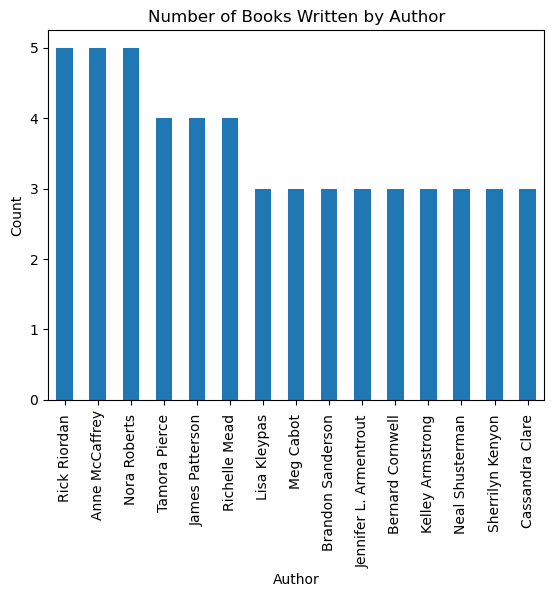

In [409]:
df["Author"].value_counts().head(15).plot.bar()
plt.xlabel('Author')
plt.ylabel(('Count'))
plt.title('Number of Books Written by Author')
plt.xticks(rotation=90)
plt.show()


### Observation:

 >* From the above bar plot we observed that there are three Authors who wrote maximum number of Books 

### > I want to know the percentage of individual Overview

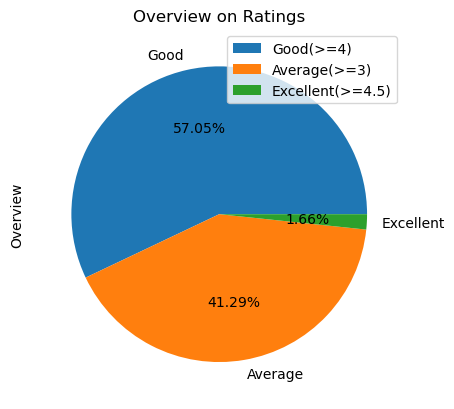

In [352]:
# pie plot

df['Overview'].value_counts().plot.pie(autopct="%.2f%%")
plt.title('Overview on Ratings')
plt.legend(['Good(>=4)','Average(>=3)','Excellent(>=4.5)'])
plt.show()

#### Observation

>* From the above pie chart we observed that most of the Books have Good Overview, means most of the books have ratings between 4 and 4.5

### > I want to know the count of Overview

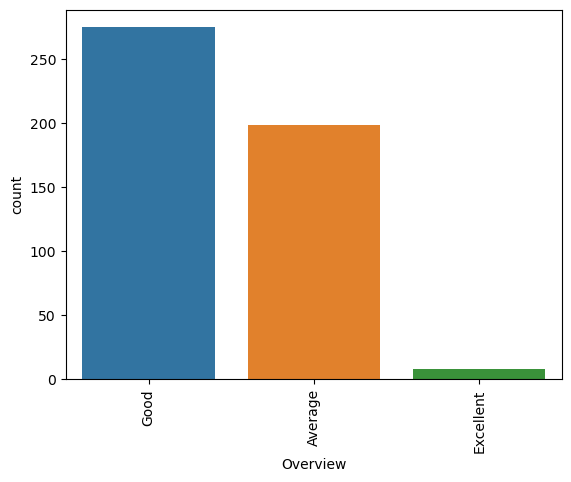

In [353]:
sns.countplot(x=df['Overview'], data=df)
plt.xticks(rotation = 90)
plt.show()

#### Observation:

>* From the above bar plot we can observe that tere are more than 250 Good Overview, more than 150 Average Overview and less than 25 Excellent Overview. 

### I want to show the relation between `Hashtag` and `Denotes` columns

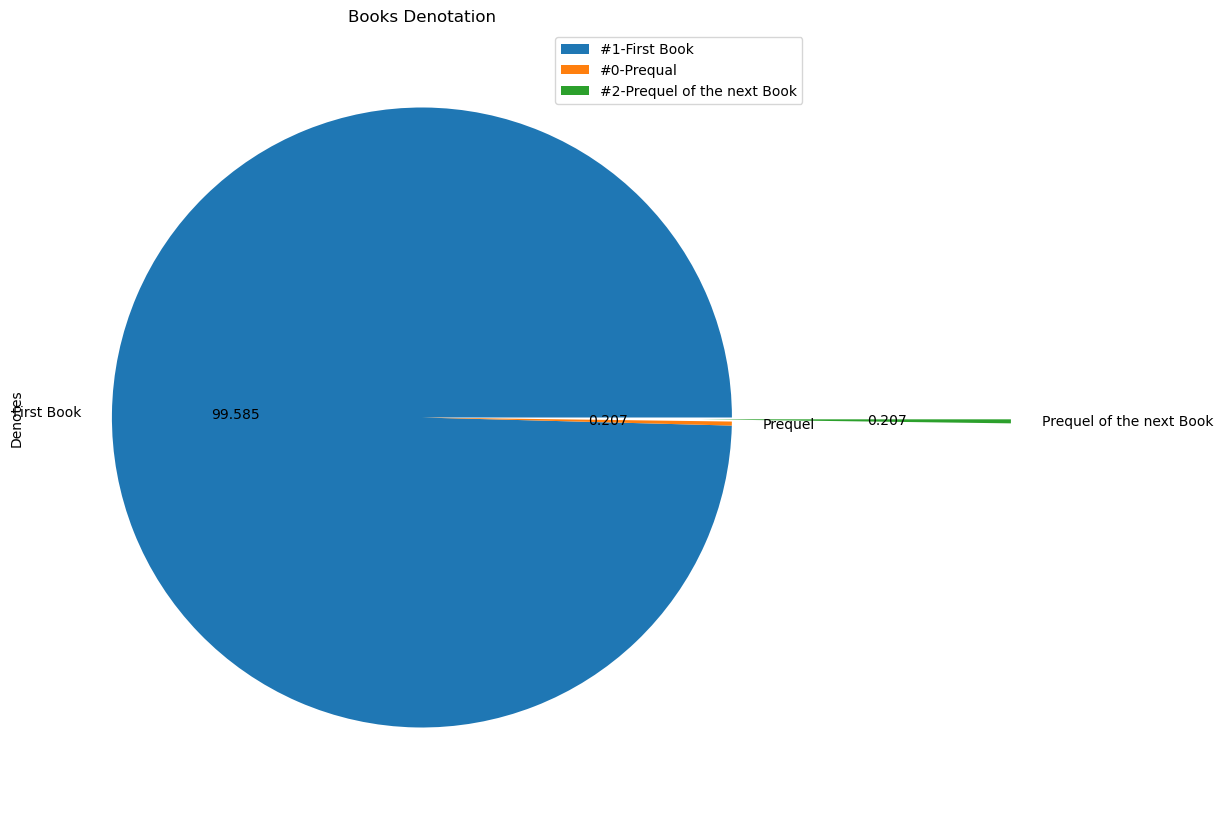

In [355]:
plt.figure(figsize=(10,20))
df["Denotes"].value_counts().plot.pie(explode=[0,0,0.9],autopct='%.3f')
plt.title('Books Denotation')
plt.legend(['#1-First Book','#0-Prequal','#2-Prequel of the next Book'])
plt.show()

### Observation:

>* From the above pie plot we obseved that most of Books are denoted as #1 which are the First Book of the Series

### > I want to know the Density of Votes

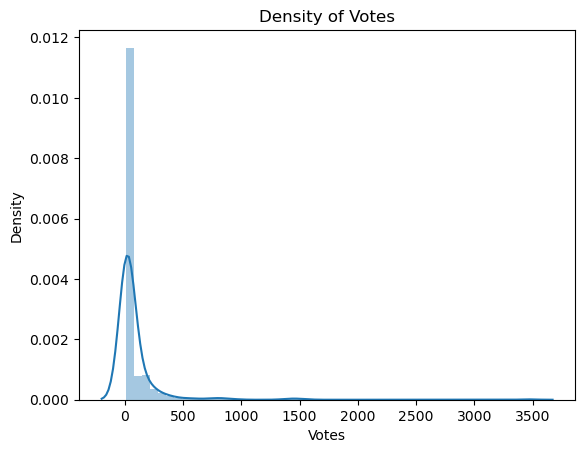

In [264]:
sns.distplot(df['Votes'],kde=True)
plt.title('Density of Votes')
plt.show()

>* From the above plot we can observe that most of the Books got Votes between 0 to 500 and very few Books got Votes greater than 1000

### hist plot

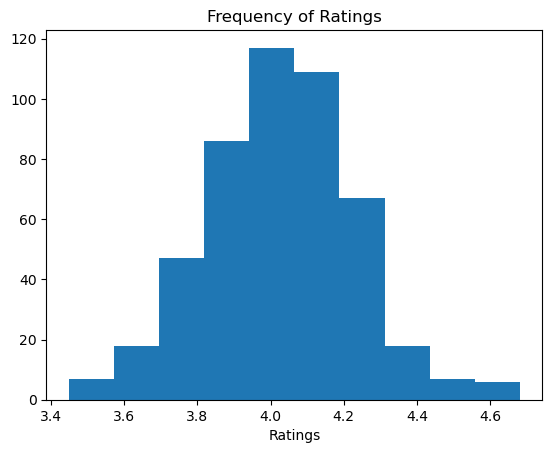

In [378]:
plt.hist(df['Ratings'])
plt.xlabel('Ratings')
plt.title('Frequency of Ratings')
plt.show()

### Observation

* This hist plot denotes Frequency distribution of Ratings

* We can observe that 4.12 rating has highest frequency 

## Bivariate

### Categorical and Numerical

### > I want to know which Series got Votes above 1000

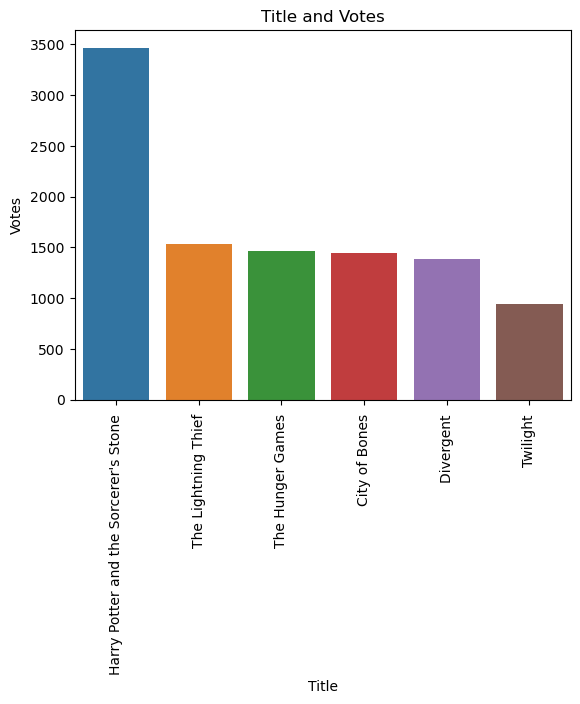

In [380]:
sns.barplot(x=df['Title'].head(6),y=df['Votes'],data=df)
plt.xticks(rotation = 90)
plt.title('Title and Votes')
plt.show()

>* From the above bar plot we can observe that Harry Potter and the Scorcer's Stone Book got Votes above 3000 and 4 more Books more above 1000

### > Relation between Votes and Score

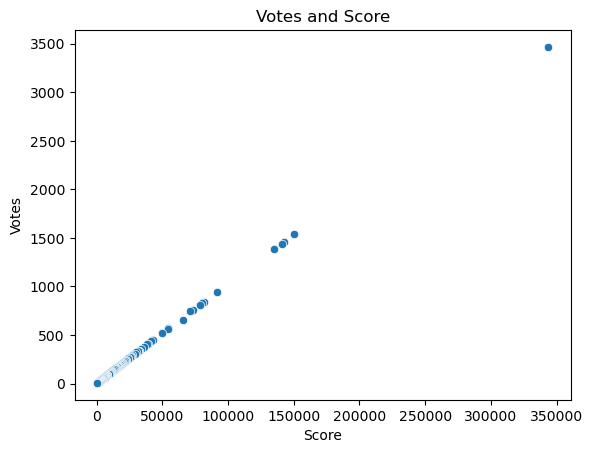

In [401]:
# Scatter plot

sns.scatterplot(x=df['Score'],y=df['Votes'],data=df)
plt.title('Votes and Score')
plt.show()

>* There is perfect positive correlation between Score and Votes nearly equal to 1 . So they depend on each other


### > Relation between Ratings and Reviews

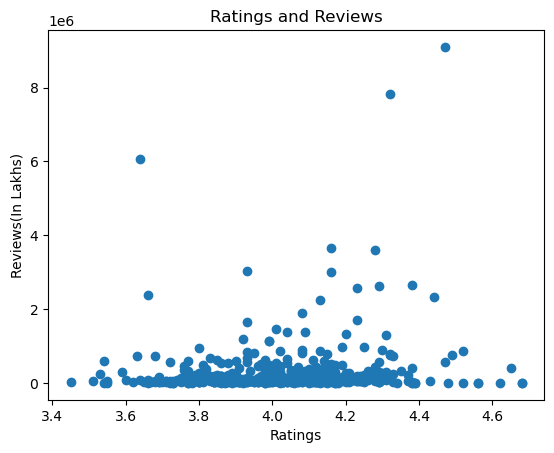

In [402]:
x=df['Ratings']
y=df['Reviews']
plt.xlabel('Ratings')
plt.ylabel('Reviews(In Lakhs)')
plt.title('Ratings and Reviews')
plt.scatter(x,y)
plt.show()

### Observation

>* From the above plot we can see Ratings and Reviews are not correlated, and they does'nt depend on each other

### Box plot

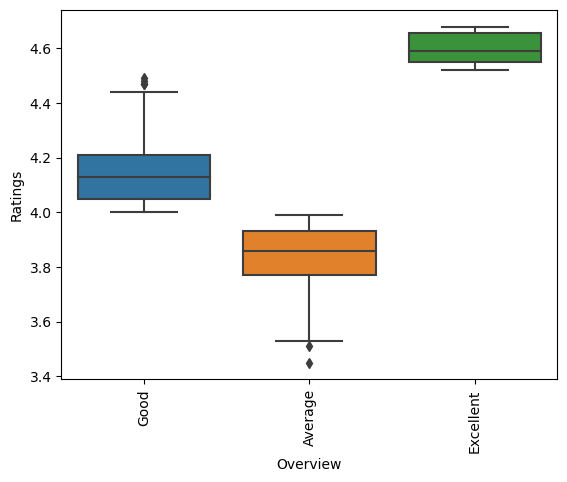

In [412]:
sns.boxplot(data=df,x='Overview', y='Ratings')
plt.xticks(rotation=90)
plt.show()

>* From the above plot we can see that there are outlayers only for Good and Average.

### violin plot

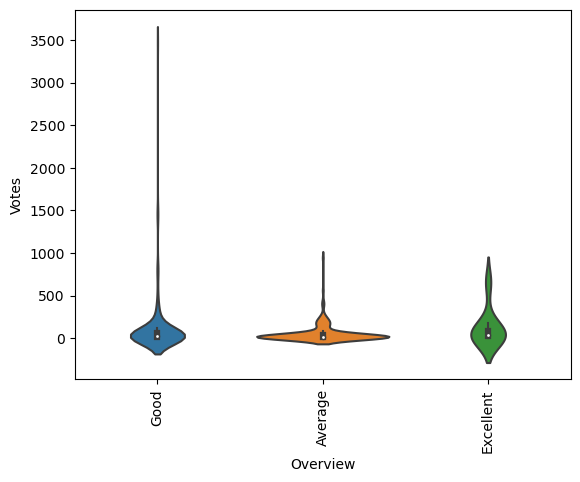

In [375]:
sns.violinplot(y=df['Votes'],x=df['Overview'],data=df)
plt.xticks(rotation = 90)
plt.show()

### Observation

>* From the above plot we can see that Average Overviewed Series have highest density of Votes

### Multivariate

In [274]:
v=df.select_dtypes(include='number')
v

,Score,Votes,Ratings,Reviews
0,343625,3467,4.47,9100670
1,149848,1537,4.29,2633971
2,142841,1462,4.32,7812649
3,140819,1442,4.08,1892338
4,134735,1388,4.16,3643042
...,...,...,...,...
477,535,6,4.33,240664
478,533,7,3.96,120398
479,532,6,4.12,25807
480,531,8,4.18,87885


### heatmap 

<AxesSubplot:>

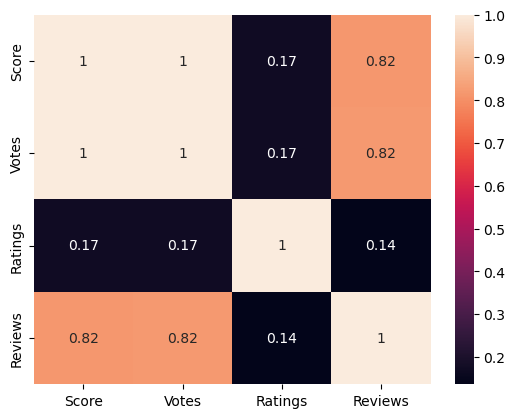

In [275]:
sns.heatmap(v.corr(),annot=True)

>* From the above heatmap plot we can observe that all numerical values are positively correlated. Score and Votes are highly correlated which means as Votes increases Score increases.Ratings and Reviews are less correlated which means as Ratings increases Reviews decreases

### pair plot

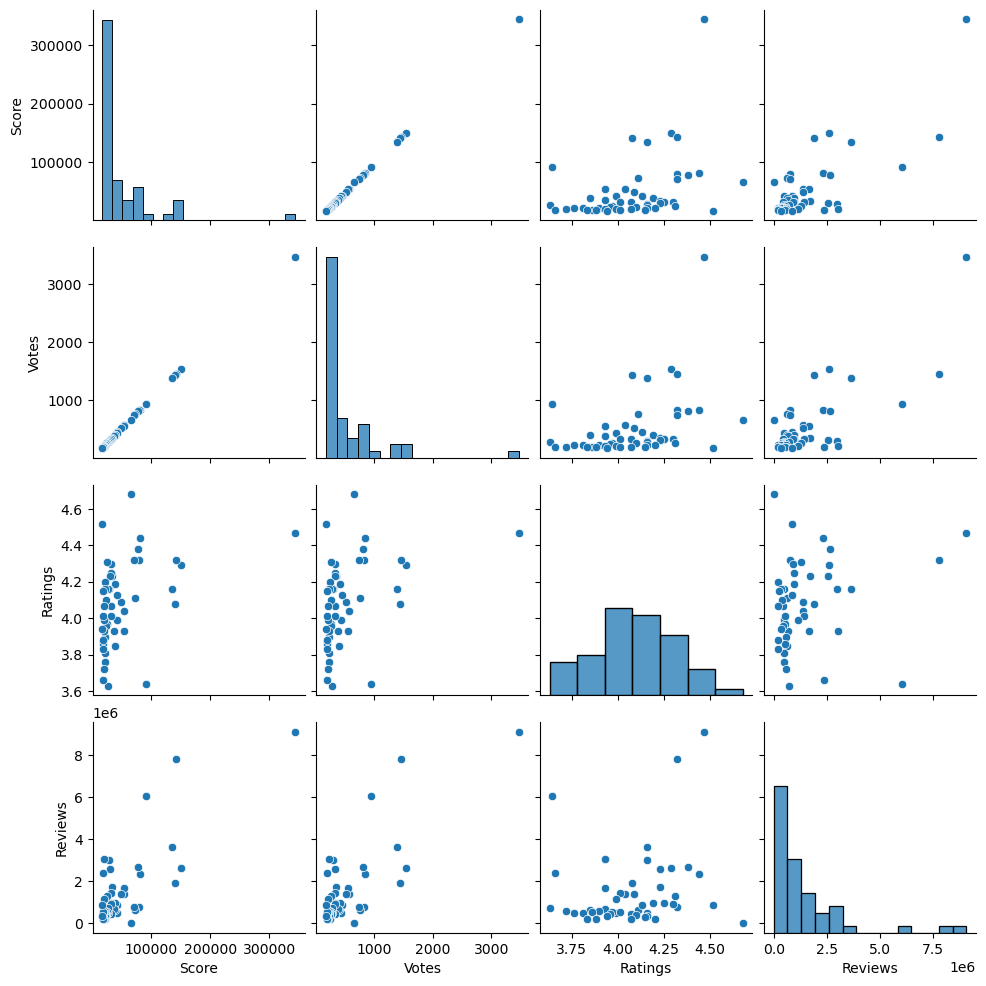

In [276]:
sns.pairplot(df.head(50))
plt.show()

### Observation

>* From the above pair plot we observed the both distribution of single variable and relation between two variable

### Scenario

In [359]:
a=float(input('Enter any Ratings greater than 4 but less than 5:'))
b=int(input('Enter any Votes greater than 1000 but less less than 3500:'))
c=int(input('Enter any Score greater than 200000 but less than 344000:'))
d=int(input('Enter any Reviews greater than 7900000 but less than 9100000:'))

Enter any Ratings greater than 4 but less than 5:4.12
Enter any Votes greater than 1000 but less less than 3500:3000
Enter any Score greater than 200000 but less than 344000:300000
Enter any Reviews greater than 7900000 but less than 9100000:8000000


In [360]:
df[(df['Ratings']>a)&(df['Votes']>b)&(df['Score']>c)&(df['Reviews']>d)]

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,343625,3467,4.47,9100670,Good,#1,First Book,Harry Potter
